In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['text.usetex']=True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
plt.rcParams.update({'font.size': 20})
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = [7.5, 4.5]

In [2]:
Data_1_electron = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph_Electrons_1.csv', sep=',')
Data_2_electron = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph_Electrons_2.csv', sep=',')
Data_3_electron = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph_Electrons_3.csv', sep=',')
Data_electron = pd.concat([Data_1_electron, Data_2_electron, Data_3_electron], axis=0)

Data_1_muon = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph_Muons_1.csv', sep=',')
Data_muon = pd.concat([Data_1_muon], axis=0)

# Cross-section plots

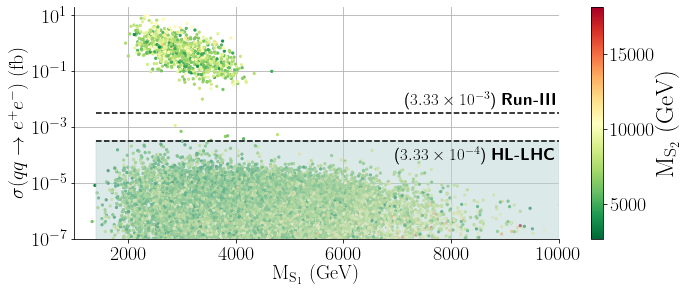

In [3]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_electron['mS1']
ys = Data_electron['xsec_TChannel (fb)']
zs = Data_electron['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)

### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.8*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.2*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')


plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (qq\rightarrow e^+e^-)~(\mathrm{fb})$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-7, 20])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_electron.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_electron.pdf', bbox_inches='tight', dpi=500.0)

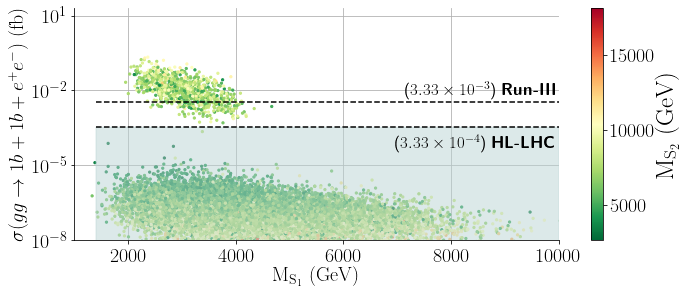

In [4]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_electron['mS1']
ys = Data_electron['xsec_GluonSplit (fb)']
zs = Data_electron['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 1b + 1b + e^+e^-)~\mathrm{(fb)}$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-8, 20])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_electron.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_electron.pdf', bbox_inches='tight', dpi=500.0)

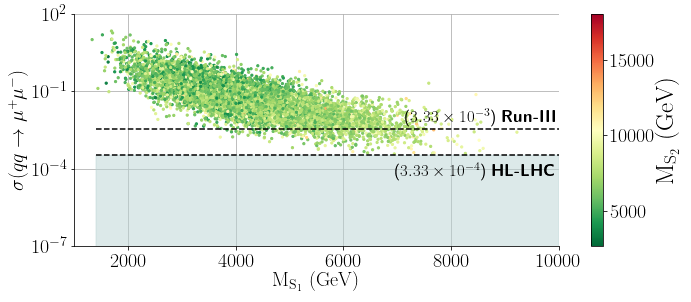

In [5]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_TChannel (fb)']
zs = Data_muon['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)

### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')


plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (qq\rightarrow \mu^+\mu^-)$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-7, 100])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2_muon.pdf', bbox_inches='tight', dpi=500.0)

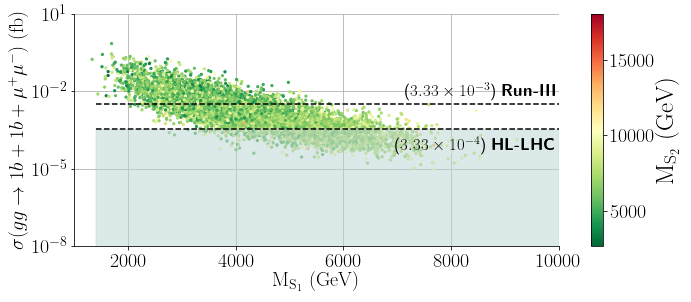

In [6]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data_muon['mS1']
ys = Data_muon['xsec_GluonSplit (fb)']
zs = Data_muon['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(7150,1.9*run_III,'({Xsec})~\\textbf{{Run-III}}'.format(Xsec = run_III_xsec),fontsize=17)
plt.plot(xline,sen_III,'--k')

### HL-LHC sensitivity line ###
N = 1000
run_HL = 1/3000
sen_HL = run_HL*np.ones(N)
xline = np.linspace(1400, 10000, 1000)
run_HL_xsec = ("$"+str(f"{run_HL:.2e}").replace("e", "\\times 10^{")+"}$").replace("04", "4")

plt.text(6950,0.15*run_HL,'({Xsec})~\\textbf{{HL-LHC}}'.format(Xsec = run_HL_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_HL,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_HL,'--k')

plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 1b + 1b + \mu^+\mu^-)~\mathrm{(fb)}$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-8, 10])
plt.xlim([1000, 10000])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_muon.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2_muon.pdf', bbox_inches='tight', dpi=500.0)

# Kinematic and angular distributions plots

In [7]:
LQ_100GeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_100GeV.csv', sep=',')
LQ_500GeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_500GeV.csv', sep=',')
LQ_1TeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_1TeV.csv', sep=',')
LQ_1p5TeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_1500TeV.csv', sep=',')
LQ_2TeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_2TeV.csv', sep=',')
LQ_3TeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_3TeV.csv', sep=',')
LQ_4TeV = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/LQ_Tchannel_4TeV.csv', sep=',')

In [8]:
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{inputenc}'
plt.rcParams.update({'font.size': 55})

In [9]:
#Drop variables
Vars = ['xs_weight']
LQ_100GeV = LQ_100GeV.drop(Vars,axis=1)
LQ_500GeV = LQ_500GeV.drop(Vars,axis=1)
LQ_1TeV = LQ_1TeV.drop(Vars,axis=1)
LQ_1p5TeV = LQ_1p5TeV.drop(Vars,axis=1)
LQ_2TeV = LQ_2TeV.drop(Vars,axis=1)
LQ_3TeV = LQ_3TeV.drop(Vars,axis=1)
LQ_4TeV = LQ_4TeV.drop(Vars,axis=1)

In [10]:
labels = [r'$p_T(\mu^-)~(\mathrm{GeV})$', r'$p_T(\mu^+)~(\mathrm{GeV})$', r'$E(\mu^-)~(\mathrm{GeV})$',
          r'$E(\mu^-)~(\mathrm{GeV})$', r'$\eta(\mu^-)$', r'$\eta(\mu^+)$', r'$\phi(\mu^-)$',
          r'$\phi(\mu^+)$', r'$\Delta R (\mu^-, \mu^+)$', r'$\Delta \phi (\mu^-, \mu^+)$',
          r'$\Delta \theta (\mu^-, \mu^+)$', r'$\Delta \eta (\mu^+, \mu^-)$', r'$\cos (\theta_{\mu^+, \mu^-})$',
          r'$p^{\mathrm{CM}}_T(\mu^-)~\mathrm{GeV}$', r'$p^{\mathrm{CM}}_T(\mu^+)~\mathrm{GeV}$',
          r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$', r'$E^{\mathrm{CM}}(\mu^-)~\mathrm{GeV}$',
          r'$\eta^{\mathrm{CM}}(\mu^-)$', r'$\eta^{\mathrm{CM}}(\mu^+)$', r'$\phi^{\mathrm{CM}}(\mu^-)$',
          r'$\phi^{\mathrm{CM}}(\mu^+)$', r'$\Delta R^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \phi^{\mathrm{CM}} (\mu^-, \mu^+)$',
          r'$\Delta \theta^{\mathrm{CM}} (\mu^-, \mu^+)$', r'$\Delta \eta^{\mathrm{CM}} (\mu^+, \mu^-)$',
          r'$\cos (\theta^{\mathrm{CM}}_{\mu^+, \mu^-})$', r'$b_2^{\mu^+, \mu^-}$', r'$b_4^{\mu^+, \mu^-}$',
          r'$M(\mu^+, \mu^-)~(\mathrm{GeV})$', r'$\cos (\theta^{R-axis}_{\mu^-})$', r'$\cos (\theta^{R-axis}_{\mu^+})$',
          r'$\cos (\theta^{N-axis}_{\mu^-})$', r'$\cos (\theta^{N-axis}_{\mu^+})$']

/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/felipe/anaconda3/envs/MadGraph-py3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


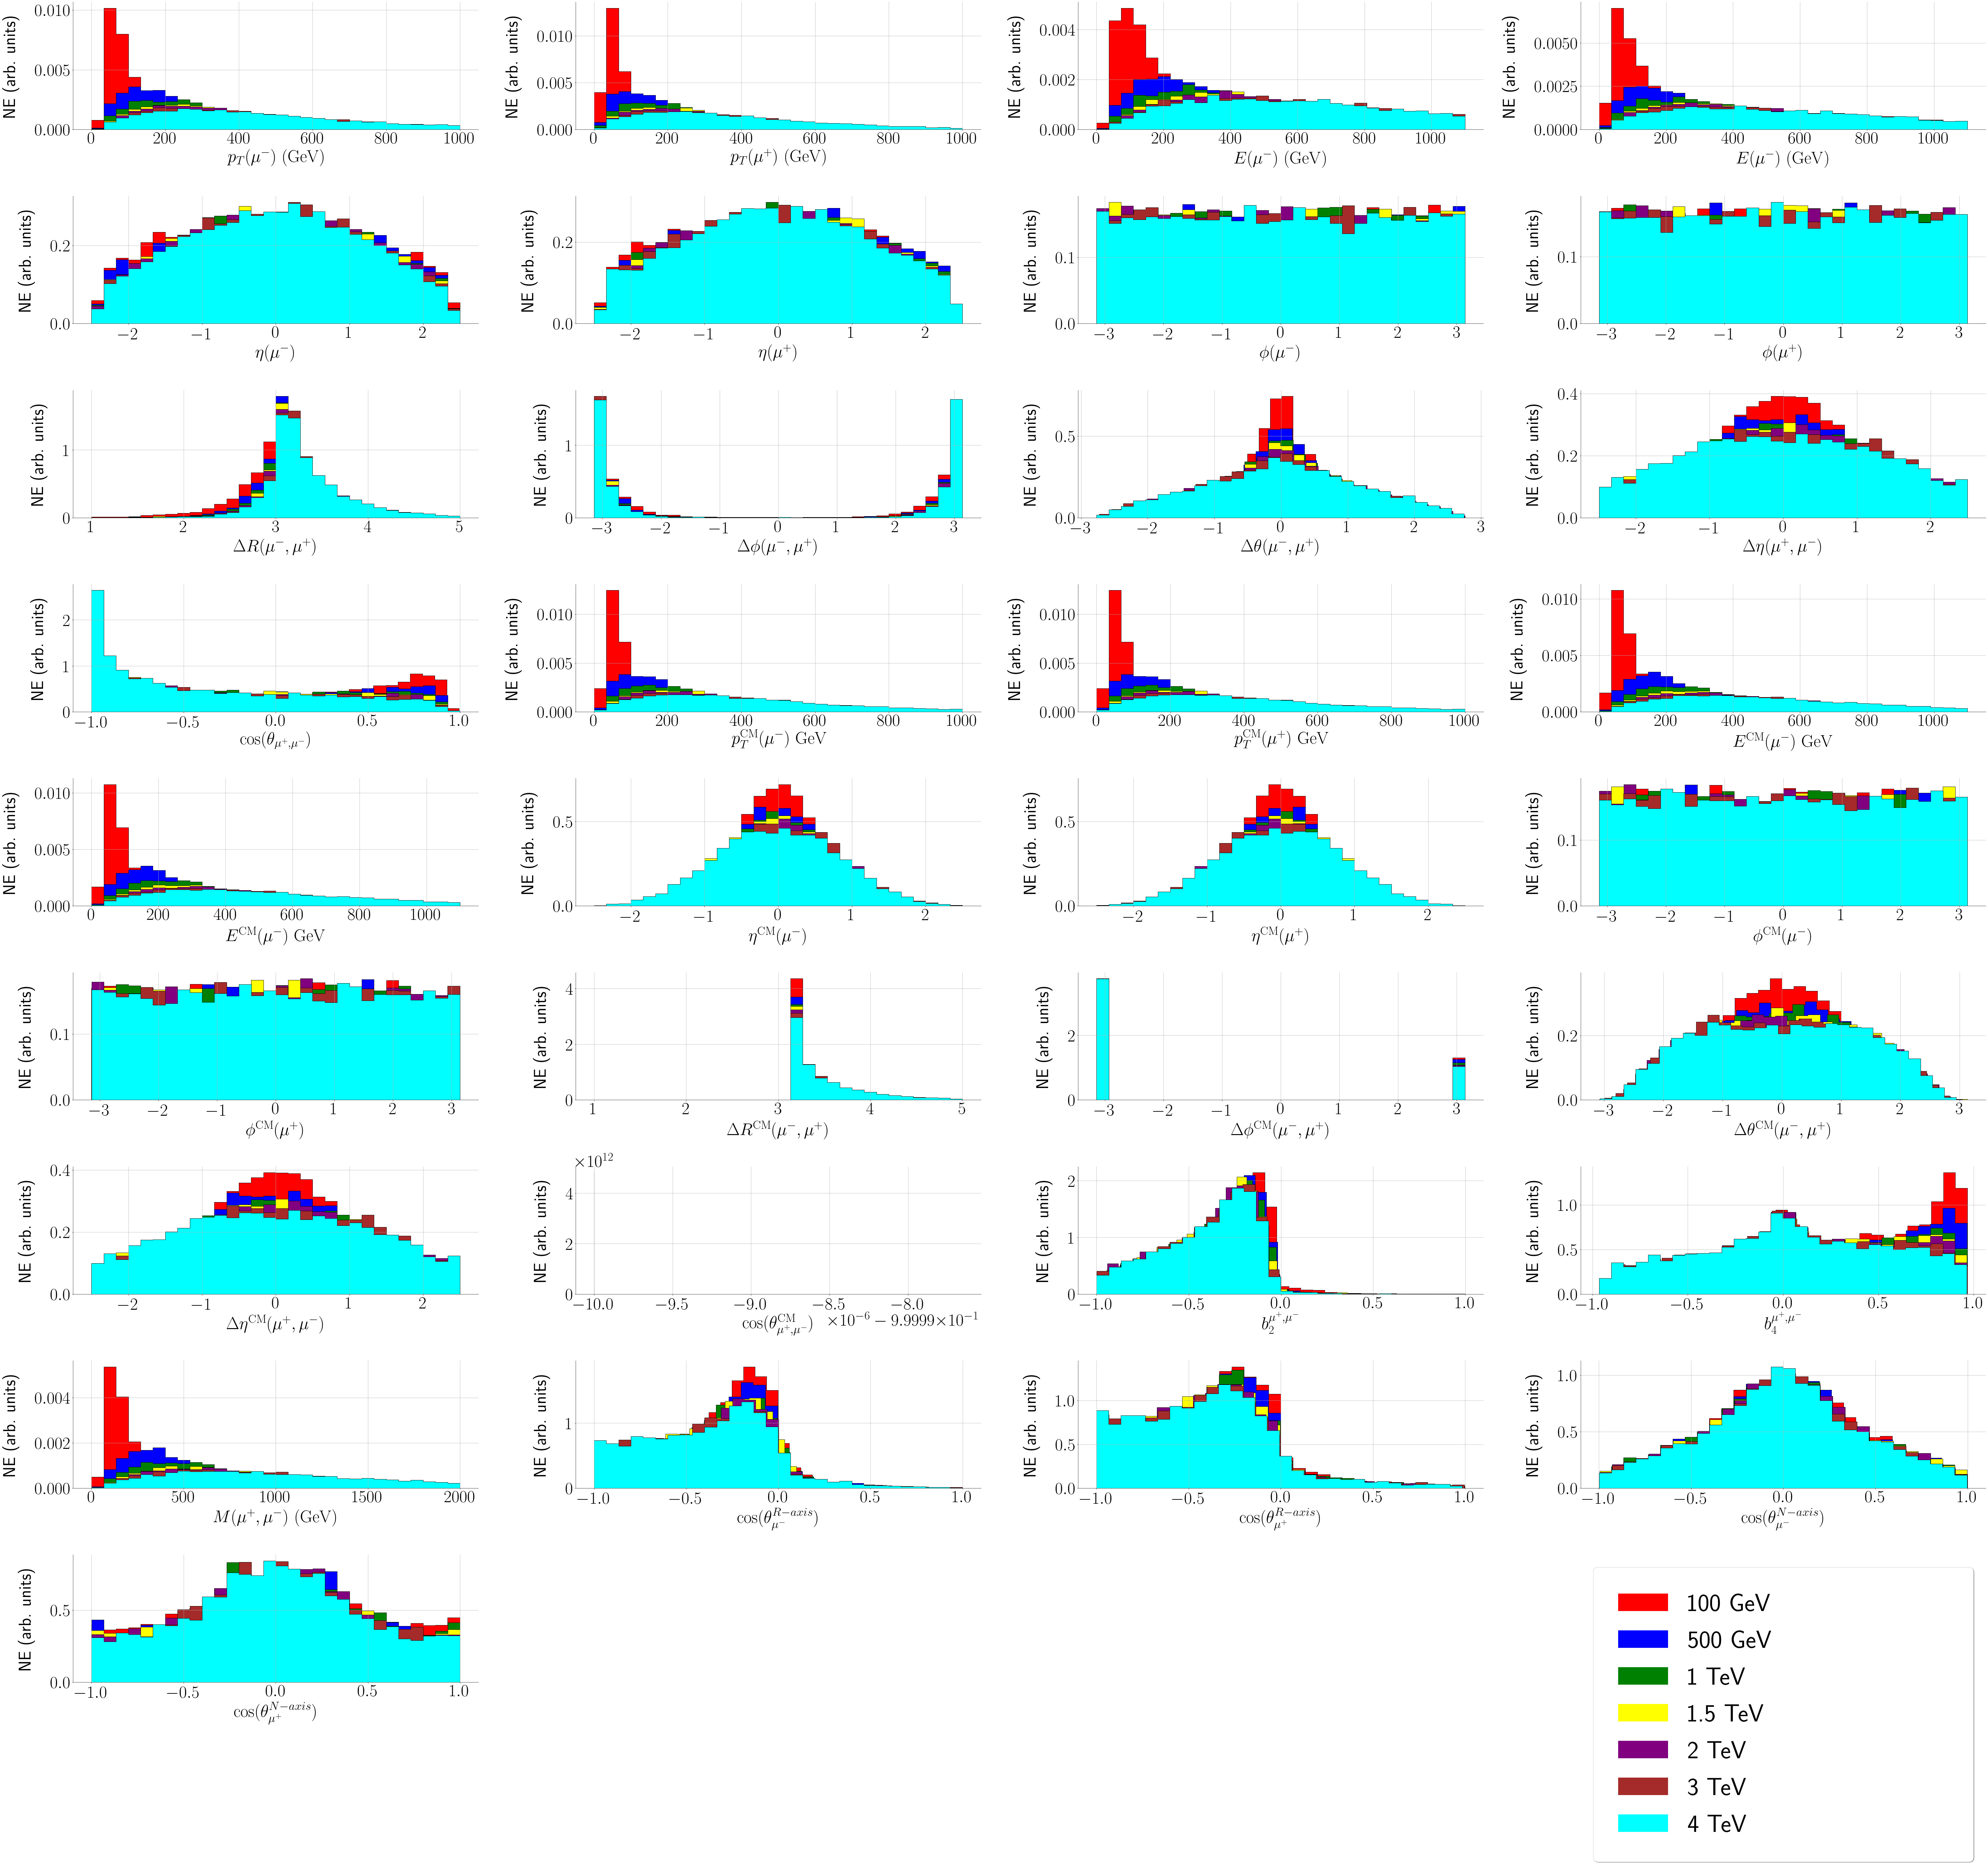

In [13]:
num_cols=4
N=len(labels)+1
fig, axes = plt.subplots(nrows=9,ncols=num_cols,figsize=(90,90))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, feature in enumerate(labels):

    var_100GeV = LQ_100GeV.iloc[:,i]
    var_500GeV = LQ_500GeV.iloc[:,i]
    var_1TeV = LQ_1TeV.iloc[:,i]
    var_1p5TeV = LQ_1p5TeV.iloc[:,i]
    var_2TeV = LQ_2TeV.iloc[:,i]
    var_3TeV = LQ_3TeV.iloc[:,i]
    var_4TeV = LQ_4TeV.iloc[:,i]
    
    if feature.__contains__('p_T'):
        var_100GeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ")
        var_4TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    elif feature.__contains__('p^{\mathrm{CM}}'):
        var_100GeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(0, 1000), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ")
        var_4TeV.hist(ax=axes[i],range=(0, 1000),bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    elif feature.__contains__('E'):
        var_100GeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ")
        var_4TeV.hist(ax=axes[i],range=(0, 1100), bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"3 TeV LQ")
    elif feature.__contains__('\Delta R'):
        var_100GeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ")
        var_4TeV.hist(ax=axes[i],range=(1, 5), bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    elif feature.__contains__('\eta'):
        var_100GeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ") 
        var_4TeV.hist(ax=axes[i],range=(-2.5, 2.5), bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    elif feature.__contains__('M(\mu^+, \mu^-)'):
        var_100GeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ") 
        var_4TeV.hist(ax=axes[i],range=(0., 2000.), bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    else:
        var_100GeV.hist(ax=axes[i], bins=30,density=True,edgecolor='black',color='red',histtype="stepfilled",label=r"100 GeV LQ")
        var_500GeV.hist(ax=axes[i], bins=30,density=True,edgecolor='black',color='blue',histtype="stepfilled",label=r"500 GeV LQ")
        var_1TeV.hist(ax=axes[i], bins=30,density=True,edgecolor='black',color='green',histtype="stepfilled",label=r"1 TeV LQ")
        var_1p5TeV.hist(ax=axes[i], bins=30,density=True,edgecolor='black',color='yellow',histtype="stepfilled",label=r"1.5 TeV LQ")
        var_2TeV.hist(ax=axes[i],bins=30,density=True,edgecolor='black',color='purple',histtype="stepfilled",label=r"2 TeV LQ")
        var_3TeV.hist(ax=axes[i],bins=30,density=True,edgecolor='black',color='brown',histtype="stepfilled",label=r"3 TeV LQ")
        var_4TeV.hist(ax=axes[i],bins=30,density=True,edgecolor='black',color='cyan',histtype="stepfilled",label=r"4 TeV LQ")
    
    axes[i].set_xlabel(feature, labelpad = 10.0)
    axes[i].set_ylabel("NE (arb. units)", labelpad = 50.0)

axes[-1].hist([], color='red',histtype="stepfilled",label="100 GeV")
axes[-1].hist([], color='blue',histtype="stepfilled",label="500 GeV")
axes[-1].hist([], color='green',histtype="stepfilled",label="1 TeV")
axes[-1].hist([], color='yellow',histtype="stepfilled",label="1.5 TeV")
axes[-1].hist([], color='purple',histtype="stepfilled",label="2 TeV")
axes[-1].hist([], color='brown',histtype="stepfilled",label="3 TeV")
axes[-1].hist([], color='cyan',histtype="stepfilled",label="4 TeV")

axes[-1].legend(loc = 'best', mode="expand", framealpha = 1.0 ,shadow=True, borderpad = 1.0, prop = {'size': 80})
axes[-1].axis('off') 
axes[-2].axis('off')     
axes[-3].axis('off')     
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/All_plots.pdf')
#plt.show()